## **CASO DE APLICACIÓN AGRUPAMIENTO: AEROLÍNEA (MERCADEO)**

Una aerolínea tiene la necesidad de identificar la estrategia de atención de sus clientes,
identificando la posibilidad de generar esquemas diferenciados de acción dependiendo de las
determinaciones y capacidades de los clientes. Es por esto que el equipo de mercadeo decidió
realizar una encuesta tratando de levantar de manera demográfica el comportamiento de los
clientes.

## Metodología ASUM-DM

1. **Entendimiento del Negocio:** Es una aerolínea que busca entender a sus clientes en particular, el objetivo de negocio es *entender las diferencias o particularidades entre clientes* para ofrecer modelos diferencias de actuación. (Todos los clientes se sientan únicos)

2. **Enfoque Analítico:** Diseñar un experimento que permita *agrupar* en una cantidad específica de grupos a los clientes de la aerolínea para definir la cantidad de acciones diferenciadas posibles.

3. **Requerimiento de Datos:** Se requieren *datos demográficos, datos del servicio prestado al usuario, datos propios del negocio.*

4. **Recolección de Datos:**

    <img src="../Computación Científica/Datasets/Datos_Airline.png" alt="Datos Airline" width="500" />


5. **Entendimiento de Datos:**

- Identificar la existencia de datos nulos
- Exploración univariada de los datos
- Exploración multivariada de los datos
- Identificación de correlación y multicolinealidad

## Entendimiento de Datos

In [1]:
# Tratamiento estructurado de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Advertencias
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Computación Científica/Datasets/airline_loyalty.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

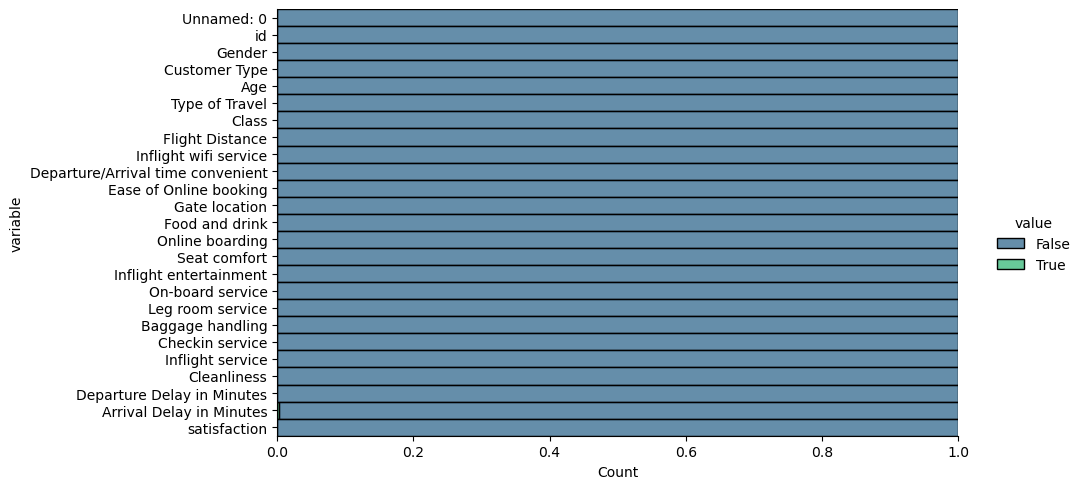

In [23]:
# Visualización de la existencia de datos nulos por variable
# data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=2))
sns.displot(data=data.isnull().melt(), y='variable', palette='viridis', hue='value', multiple='fill', aspect=2)
plt.show()

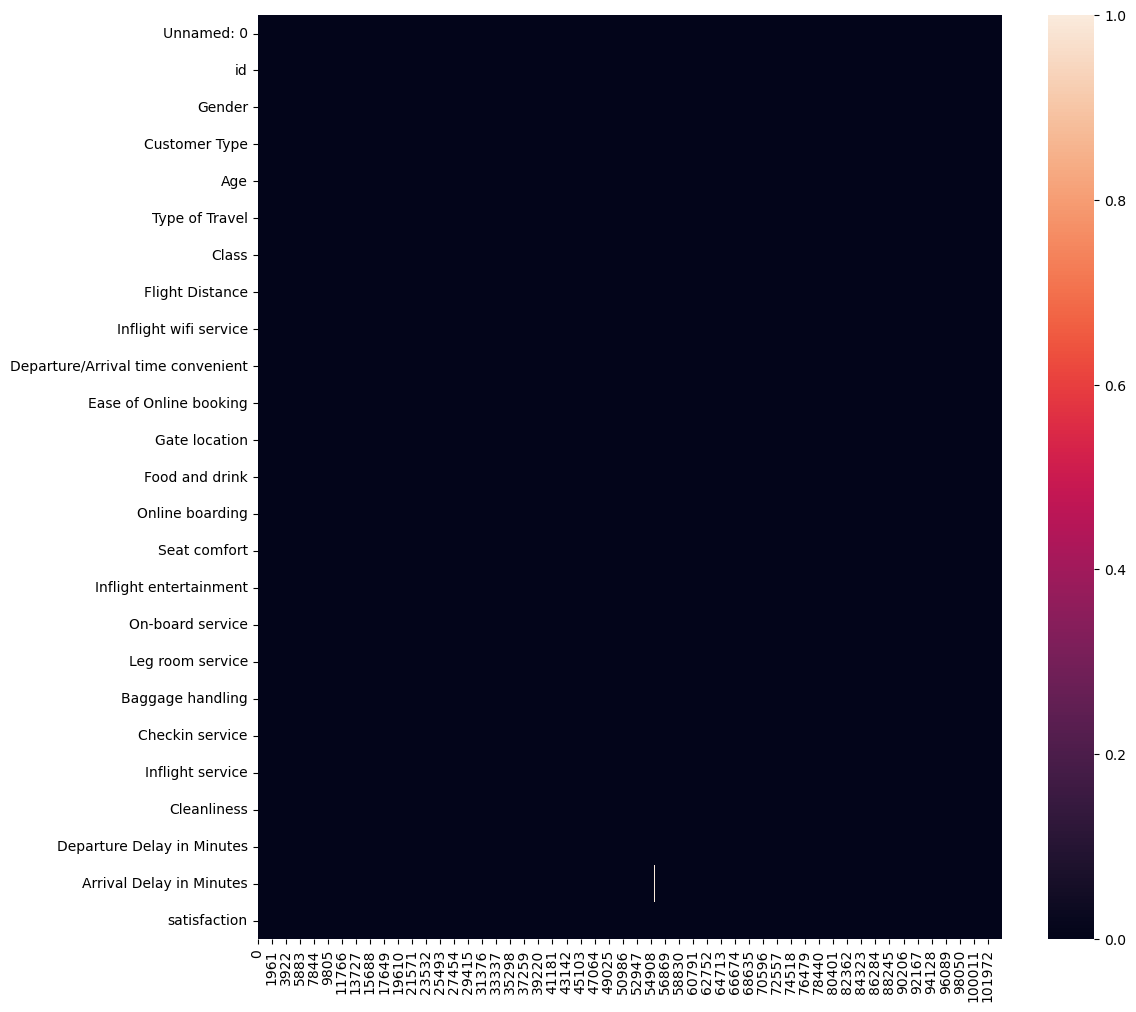

In [24]:
plt.figure(figsize=(12,12))
data.isnull().transpose().pipe(lambda df: sns.heatmap(data = df))
plt.show()

## Exploración Univariada de los datos

- Para datos numéricos: histogramas de frecuencia
- Para datos categóricos: gráficos de torta

### Variables Numéricas

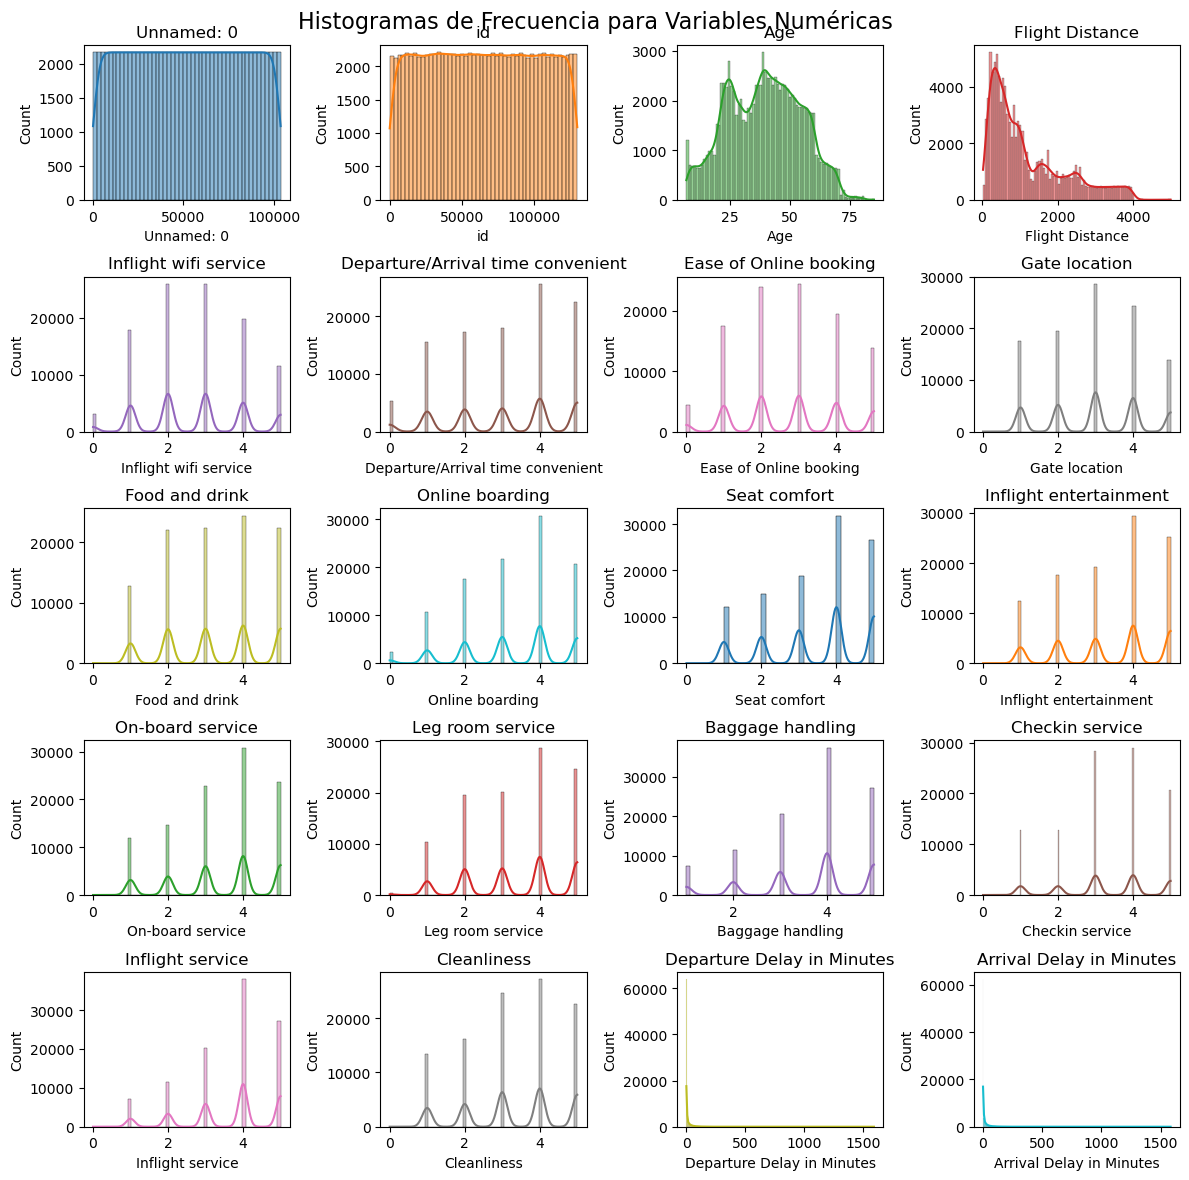

In [25]:
# HISTOGRAMAS DE FRECUENCIA PARA VARIABLES NUMÉRICAS

fig, ax = plt.subplots(5, 4, figsize=(12, 12))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histogramas de Frecuencia para Variables Numéricas', fontsize=16)
plt.show()

**Análisis**

- ID: No es relevante para el modelo (Suma importancia para el manejo de datos)
- Edad (Binomial -> 2 Picos): No hay variables negativos - No tiene sentido personas de 0 años llenando un formulario
- Fligth Distance (LogN): La mayoría de los vuelos son de distancias cortas (Es más rentable para la compañía)
- Variables de clasificación (0-5 -> Escala Leaker): Cualificables - Si ya están numéricas significa que ya están codificadas - Se pueden observar frecuencias

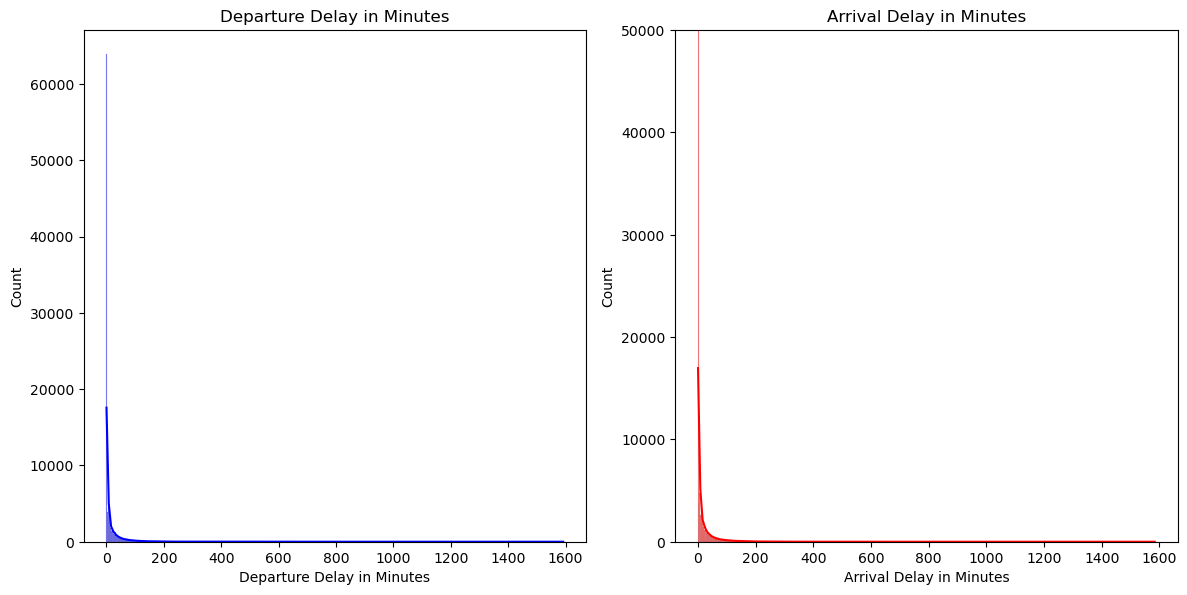

In [26]:
# Departure Delay in Minutes anda Arrival Delay in Minutes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.flat
sns.histplot(
    data = data,
    x = 'Departure Delay in Minutes',
    kde = True,
    color = 'blue',
    ax = ax[0]
)
ax[0].set_title('Departure Delay in Minutes')

sns.histplot(
    data = data,
    x = 'Arrival Delay in Minutes',
    kde = True,
    color = 'red',
    ax = ax[1]
)
ax[1].set_title('Arrival Delay in Minutes')

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.ylim(0, 50000)
plt.show()

**Comportamiento de la Variable**

- Cuando se compara la gráfica y relacionamos el comportamiento de la variable con el de una distribución revisamos si hay valores negativos, estos si serían atipicos, y todos los elementos menores a cero se convierten en 0 osea nulos
- En el contexto de negocio de esta variable no es raro que tengamos tantos valores en 0, no nos podemos basar solo en la estadistica

### Variables Categóricas

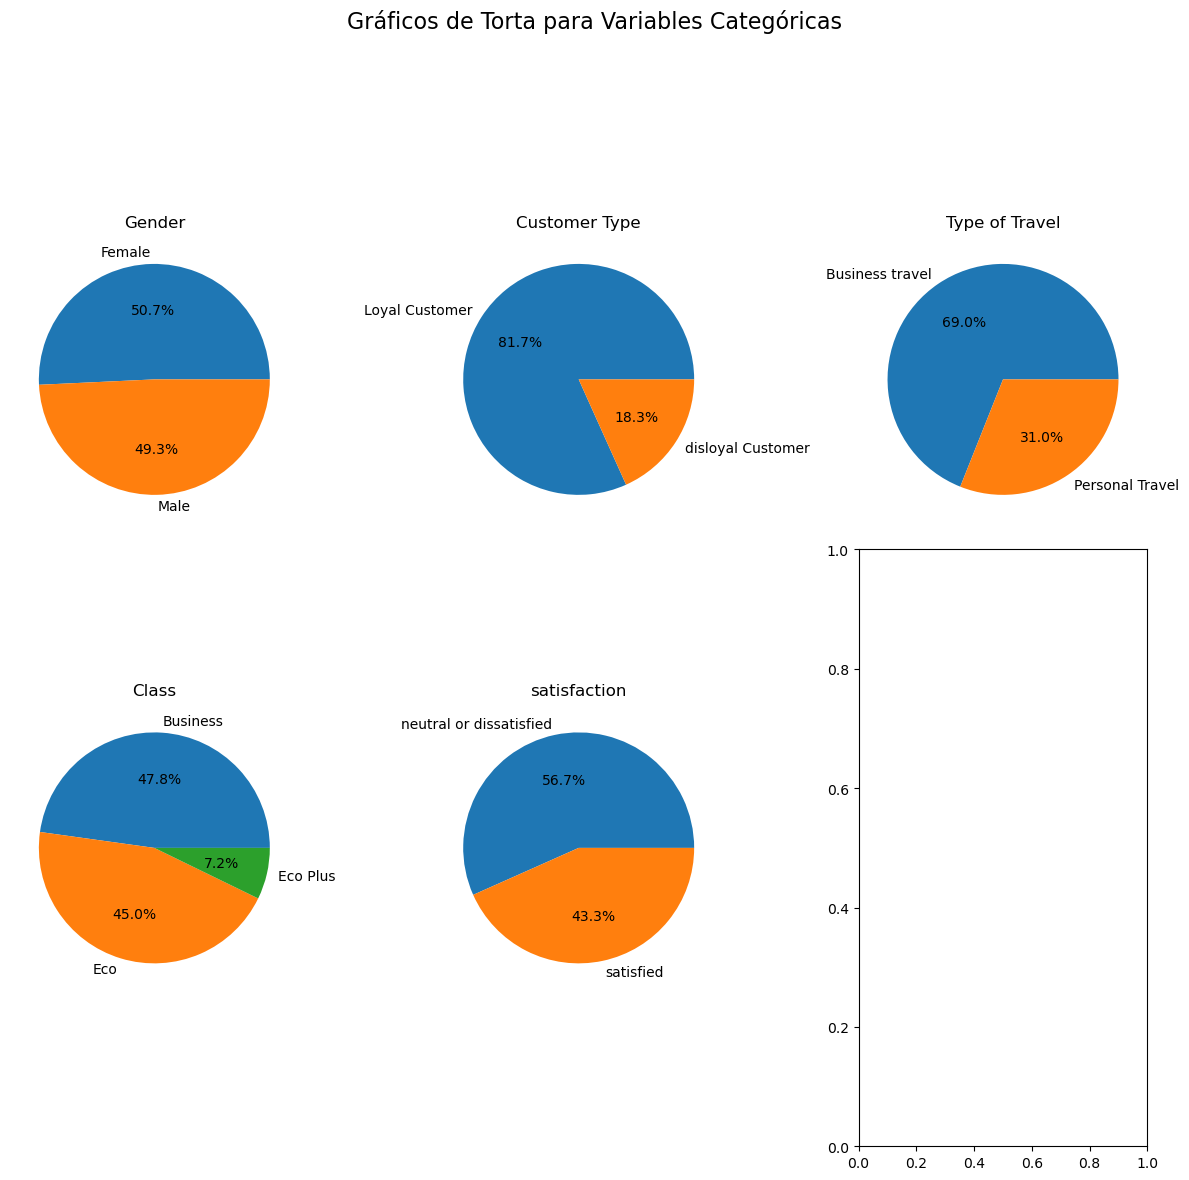

In [27]:
# GRÁFICOS DE TORTA PARA VARIABLES CATEGÓRICAS

fig, ax = plt.subplots(2 , 3 , figsize=(12,12))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns # SOLO VAMOS A GRAFICAR VARIABLES CATEGÓRICAS
for i, col in enumerate(cat_col):
 ax[i].pie(x = data[col].value_counts(),
          labels = data[col].value_counts().index,
          autopct = '%.1f%%')
 ax[i].set_title(col)
 fig.tight_layout()
 fig.subplots_adjust(top=0.92)
 fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**Análisis**

- Customer Type: Se ignora debido a que uno de sus valores supera el 80%, lo que significa que está desbalanceada

## Factor de Correlación

- **-0.25  < ro > 0.25** nula
- **+/- (0.5  < ro > 0.25)**  debíl 
- **+/- (0.75  < ro > 0.5)**  moderada
- **+/- (1  < ro > 0.75)** fuerte

**→ Correlación fuerte en X y NO en Y → Ignoro variables**

**→ Correlación fuerte en X y en Y → No ignoro variables**

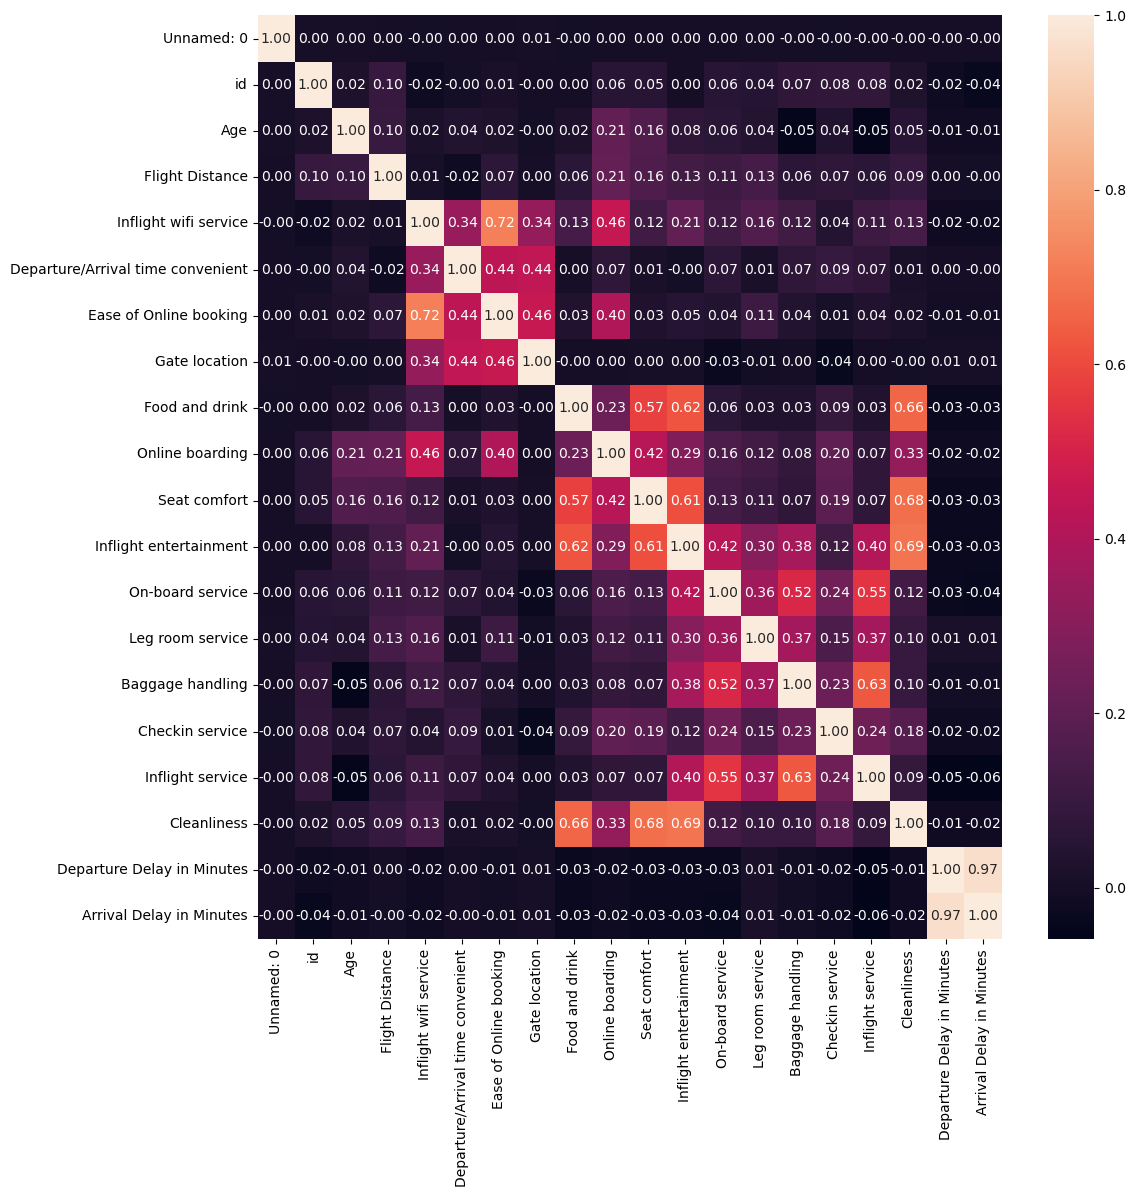

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(data = data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

**Análisis**

- Se observa que Departure Delay y Arrival Delay tienen una correlación fuerte de 0.97 (ro > 0.75)
- Para decidir cual se elimina de las dos, se observa la correlación de cada una con las demás variables y se elimina la que tenga mayor correlación (Arrival Delay)

## Preparación de los Datos

- Activamos las decisiones de ignorar variables 
- Transformación de variables para que sean "entendibles"

In [4]:
# Eliminación de las variables que se IGNORARON
data_mod = data.drop(columns=['Unnamed: 0', 'id', 'Customer Type', 'Arrival Delay in Minutes'])
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Age                                103904 non-null  int64 
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Flight Distance                    103904 non-null  int64 
 5   Inflight wifi service              103904 non-null  int64 
 6   Departure/Arrival time convenient  103904 non-null  int64 
 7   Ease of Online booking             103904 non-null  int64 
 8   Gate location                      103904 non-null  int64 
 9   Food and drink                     103904 non-null  int64 
 10  Online boarding                    103904 non-null  int64 
 11  Seat comfort                       103904 non-null  

### Transformación

In [5]:
from sklearn.compose import ColumnTransformer # Transformación de variables categóricas y numéricas
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler #Onehot ya que no son normales 
from sklearn.pipeline import Pipeline # Pipeline para transformar las variables categóricas y numéricas

In [6]:
# Selección de columnas numéricas y categóricas
num_col = data_mod.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include=['object']).columns.to_list()

# Definición de transformaciones
numtrans = Pipeline(steps= [('scaler', MinMaxScaler())])
cattrans = Pipeline(steps= [('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num', numtrans, num_col), 
    ('cat', cattrans, cat_col)], 
    remainder='passthrough'
)

preprocessor.fit(data_mod)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Type of Travel', 'Class',
                                  'satisfaction'])])

In [7]:
data_pre = preprocessor.transform(data_mod)
data_pre

array([[0.07692308, 0.08663166, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.23076923, 0.04119548, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.2243538 , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29487179, 0.39660743, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.19567851, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.25641026, 0.34168013, 0.2       , ..., 0.        , 1.        ,
        0.        ]], shape=(103904, 26))

In [8]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([cod_cat, num_col])
data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro.head()

,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.015704,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.000628,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.006910,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
data_sample = data_pro.sample(n=10000)

## Etapa de Ajuste: Selección del Modelo

**K-means, Aglomerative, DBdcann**

## Etapa de Validación

**Se decide cual modelo se ajusta mejor a los datos y al modelo de negocio**

## Construcción del modelo

### KMeans

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

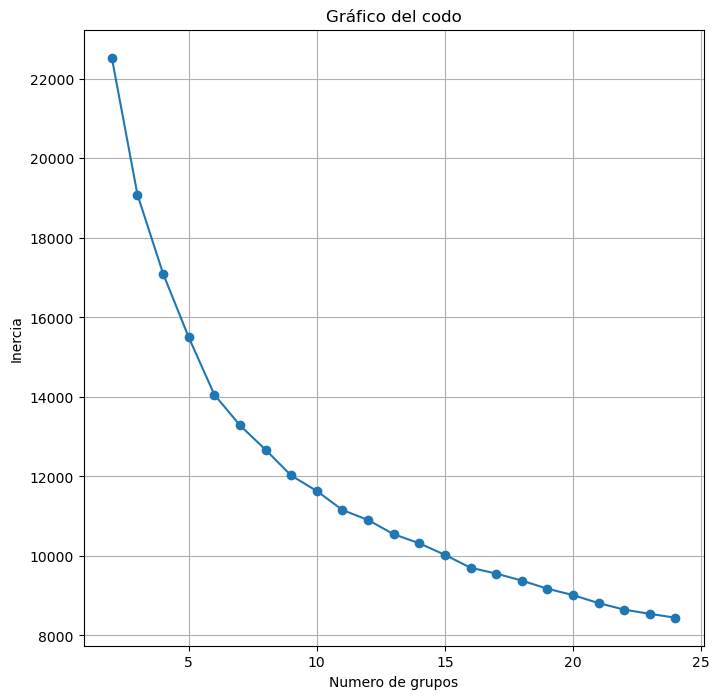

In [11]:
# Buscar el valor de K
range_k = range(2, 25)
inertia = []

for n_clusters in range_k:
    kmeans_model = KMeans(n_clusters=n_clusters,
                           n_init=20,
                           random_state=123
                           )
    kmeans_model.fit(data_sample)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range_k, inertia, marker = 'o')
plt.title('Gráfico del codo')
plt.xlabel('Numero de grupos')
plt.ylabel('Inercia')
plt.grid()
plt.show()

**Análisis**

- Entre 6-10 se genera el corte de la curva

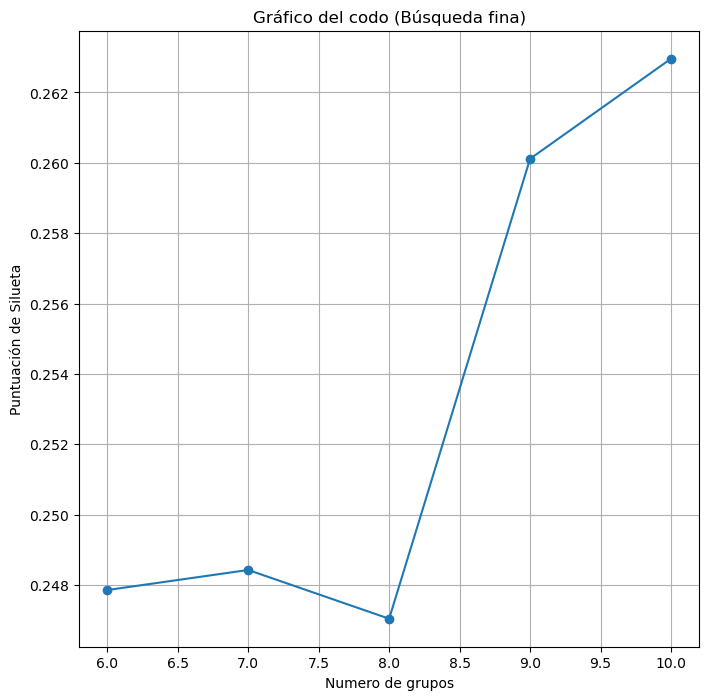

In [12]:
# Búsqueda fina de k
range_k2 = range(6,11)
sil_score = []

for n_clusters in range_k2:
    kmeans_model = KMeans(n_clusters=n_clusters,
                           n_init=20,
                           random_state=123
                           )
    kmeans_model.fit(data_sample)
    cluster_label = kmeans_model.fit_predict(data_sample)
    sil_avg = silhouette_score(data_sample, cluster_label)
    sil_score.append(sil_avg)
    
plt.figure(figsize=(8,8))
plt.plot(range_k2, sil_score, marker = 'o')
plt.title('Gráfico del codo (Búsqueda fina)')
plt.xlabel('Numero de grupos')
plt.ylabel('Puntuación de Silueta')
plt.grid()
plt.show()

**Análisis**

- Se determina según los valores máximos

In [13]:
kmeans_model_final = KMeans(n_clusters=10, 
                            n_init=20,
                            random_state=123
                            )
kmeans_model_final.fit(data_sample)

KMeans(n_clusters=10, n_init=20, random_state=123)

### Jerárquico Aglomerativo

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [15]:
#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

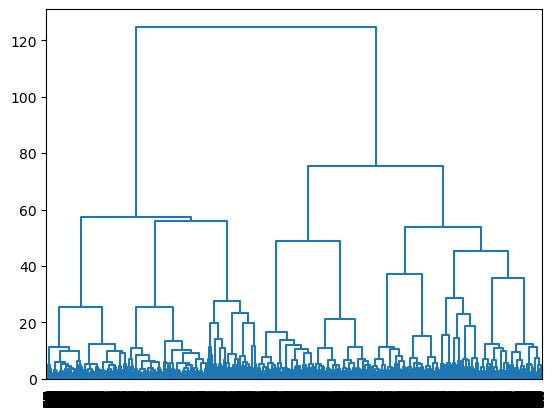

In [16]:
#Varianza
h_clust_ward = AgglomerativeClustering(metric='euclidean',
                                       linkage='ward',
                                       distance_threshold=0,
                                       n_clusters=None
                                       )
h_clust_ward.fit(X = data_sample)
dibujarDendrograma(h_clust_ward, color_threshold=0)

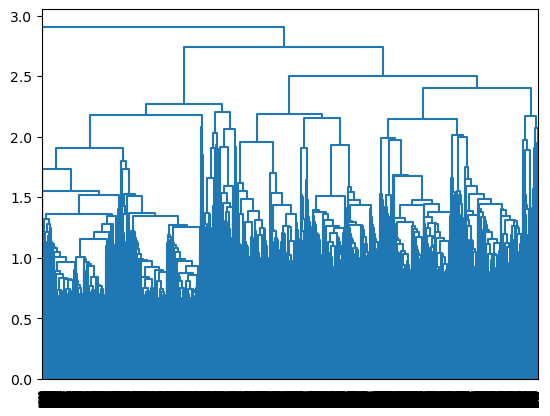

In [17]:
#Promedio
h_clust_avg = AgglomerativeClustering(metric='euclidean',
                                       linkage='average',
                                       distance_threshold=0,
                                       n_clusters=None
                                       )
h_clust_avg.fit(data_sample)
dibujarDendrograma(h_clust_avg, color_threshold=0)

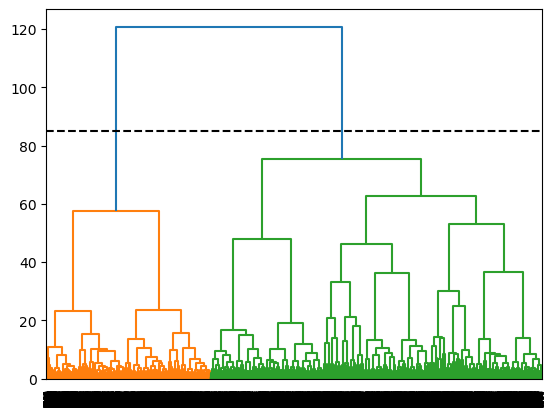

In [50]:
dendrogram_prun = 85
dibujarDendrograma(h_clust_ward, color_threshold=dendrogram_prun)
plt.axhline(y=dendrogram_prun, color='black', linestyle='--')
plt.show()

In [18]:
h_clust_final = AgglomerativeClustering(metric='euclidean',
                                        linkage='ward',
                                        n_clusters=2
                                        )
h_clust_final.fit(data_sample)

AgglomerativeClustering()

### DBScan

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

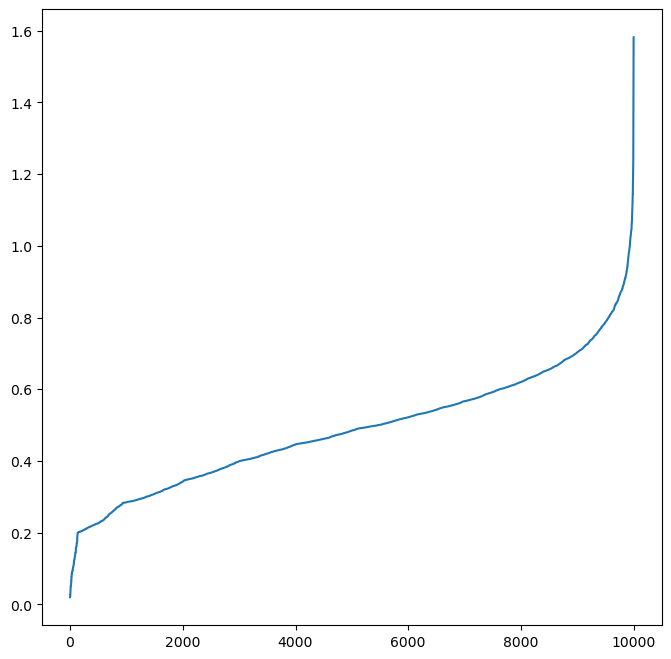

In [20]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_sample)
distance, index = neighbors_fit.kneighbors(data_sample)
distance = np.sort(distance, axis=0)
distance = distance[:, 1]

plt.figure(figsize=(8, 8))
plt.plot(distance)
plt.show()

In [23]:
eps_values = np.arange(0.8, 1.6, 0.1)
min_samples = np.arange(2, 10)
dbscan_params = list(product(eps_values, min_samples))
sil_score = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(data_sample)
    sil_score.append(silhouette_score(data_sample, y_pred))

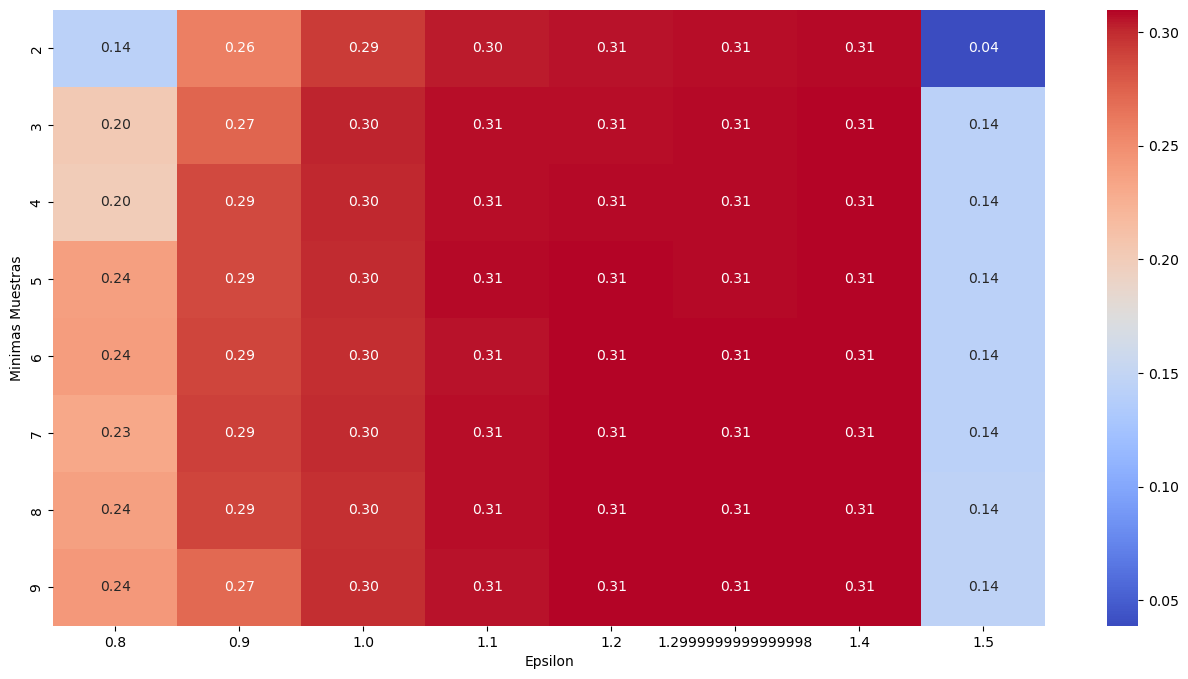

In [28]:
df_param_adj = pd.DataFrame.from_records(dbscan_params, columns=['Epsilon', 'Minimas Muestras'])
df_param_adj['Score'] = sil_score
pivot_data = pd.pivot_table(df_param_adj, values='Score', index= 'Minimas Muestras', columns='Epsilon')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='coolwarm') # viridis
plt.show()

- Mayor silhoutte Score posible
- Independientemente de la cantidad de muestras mínimas el silhoutte score va a ser el mismo para todos los individuos
- Reducción computacional: Se escoge el menor epsilon con la menor minima muestra (Utilizando el mayor Silhouette) -> Ep: 1.1 y MM: 3

In [29]:

dbscan_final = DBSCAN(eps=1.1, min_samples=3)
dbscan_final.fit(data_sample)

DBSCAN(eps=1.1, min_samples=3)

### GMM

In [30]:
from sklearn.mixture import GaussianMixture

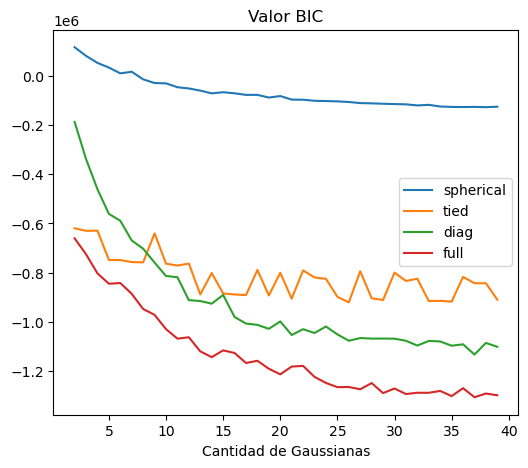

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))
n_gauss = range(2, 40) # Rango de búsqueda
var_types = ['spherical', 'tied', 'diag', 'full']
for covariance_type in var_types:
    valor_bic = []
    for n in n_gauss:
        modelo = GaussianMixture(n_components=n, covariance_type=covariance_type)
        modelo = modelo.fit(data_sample)
        valor_bic.append(modelo.bic(data_sample))
    
    ax.plot(n_gauss, valor_bic, label=covariance_type)

ax.set_title('Valor BIC')
ax.set_xlabel('Cantidad de Gaussianas')
ax.legend()
plt.show()

In [32]:
gmm_final = GaussianMixture(n_components=37, covariance_type='full')
gmm_final.fit(data_sample)

GaussianMixture(n_components=37)

## Evaluación del Modelo

In [33]:
labels_kmeans = kmeans_model_final.predict(data_sample)
labels_h_clust = h_clust_final.fit_predict(data_sample)
labels_dbscan = dbscan_final.fit_predict(data_sample)
labels_gmm = gmm_final.predict(data_sample)

In [34]:
sil_kmeans = silhouette_score(data_sample, labels_kmeans)
sil_h_clust = silhouette_score(data_sample, labels_h_clust)
sil_dbscan = silhouette_score(data_sample, labels_dbscan)
sil_gmm = silhouette_score(data_sample, labels_gmm)

In [36]:
print(f'Silhouette Score KMeans: {sil_kmeans:.2f}')
print(f'Silhouette Score HClust: {sil_h_clust:.2f}')
print(f'Silhouette Score DBSCAN: {sil_dbscan:.2f}')
print(f'Silhouette Score GMM: {sil_gmm:.2f}')

Silhouette Score KMeans: 0.26
Silhouette Score HClust: 0.24
Silhouette Score DBSCAN: 0.31
Silhouette Score GMM: 0.08


### Grupos DBSCAN

- 26 grupos
- -1: Puntos de ruido

In [38]:
np.unique(labels_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [43]:
data_sample['DBSCAN'] = labels_dbscan
data_sample

,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,DBSCAN
100965,0.512821,0.147415,0.2,0.4,0.4,0.4,0.2,0.6,0.6,0.2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
103538,0.371795,0.032108,0.2,0.2,0.2,0.6,0.4,0.2,0.4,0.4,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
66642,0.358974,0.450929,0.2,0.6,0.6,0.6,0.6,0.6,0.8,0.2,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
41688,0.500000,0.520396,0.4,1.0,0.6,0.6,0.4,0.8,0.6,0.8,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
12175,0.679487,0.433158,0.6,1.0,0.6,0.2,0.4,0.8,1.0,0.6,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98741,0.756410,0.728796,0.4,0.4,0.4,0.4,1.0,0.8,0.8,0.8,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7
29561,0.384615,0.474556,0.6,0.2,0.6,0.6,0.6,1.0,1.0,0.8,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,8
32713,0.397436,0.144386,0.4,0.2,0.2,0.8,1.0,0.2,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
66567,0.358974,0.331179,0.4,0.4,0.4,0.4,1.0,0.8,0.8,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7


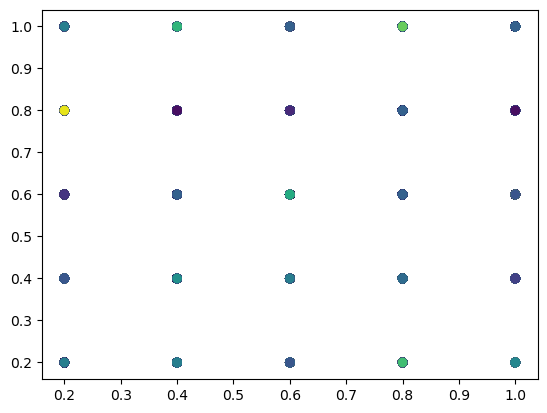

In [41]:
plt.scatter(data = data_sample, x = 'Age', y = 'Flight Distance', c = 'DBSCAN')
plt.show()

In [44]:
data_sample['DBSCAN'].value_counts()

DBSCAN
 7     1628
 5     1618
 3     1167
 2     1158
 10     706
 6      658
 0      651
 1      615
 12     303
 4      259
 18     171
 8      167
 17     124
 16     120
 15     116
 14     115
 11     112
 21      98
 19      65
 13      56
-1       32
 25      20
 9       13
 23      12
 22       7
 24       6
 20       3
Name: count, dtype: int64